In [64]:
import pandas as pd
import numpy as np 
from scipy.stats.kde import gaussian_kde
from numpy import linspace
import matplotlib.pyplot as plt
from scipy import stats

## Importing Data

In [2]:
subway_gaps = pd.read_csv('two_days')
subway_gaps['time'] = pd.to_numeric(subway_gaps['time'])


In [3]:
subway_gaps.line.unique()

array(['2', 'M', 'Q', 'R', 'W', '5', 'B', 'A', 'F', '7X', 'E', 'L', '4',
       'C', 'N', '1', '6', 'J', 'G', '7', '3', '5X', 'H', 'D', '6X'],
      dtype=object)

In [4]:
subway_gaps.head(5)

,line,time,time_to_next_subway
0,2,1544824020,13.333333
1,2,1544824080,12.333333
2,2,1544824140,11.333333
3,2,1544824200,10.333333
4,2,1544824260,9.333333


In [9]:
#Q72_waits = pd.read_csv('bus_waits_Q72.csv')
Q70_waits = pd.read_csv('Q70_waits.csv')
Q48_waits = pd.read_csv('Q48_waits.csv')
M60_waits = pd.read_csv('M60_waits.csv')


In [11]:
Q70_travel = pd.read_csv('Q70_traveltime.csv')
M60_travel = pd.read_csv('M60_Harlem_travel_time.csv')
Q48_travel = pd.read_csv('Q48_traveltime.csv')

In [12]:
Q70_travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
LGA_Arrival            45 non-null object
Departure              45 non-null object
travel_time_seconds    45 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


## Subway Line Wait Time Distributions

In [13]:
#add express trains

wait_7 = subway_gaps[subway_gaps['line'] == '7X']
wait_5 = subway_gaps[subway_gaps['line'] == '5X']
wait_W = subway_gaps[subway_gaps['line'] == 'W']
wait_F = subway_gaps[subway_gaps['line'] == 'F']
wait_G = subway_gaps[subway_gaps['line'] == 'G']

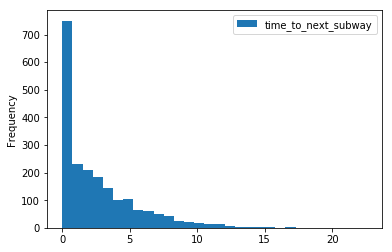

In [14]:
wait_7.plot.hist(x='time', y='time_to_next_subway', bins=30)

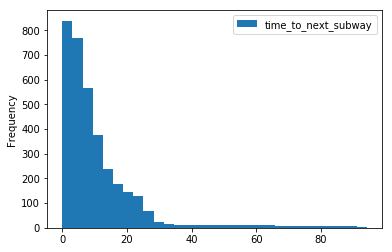

In [15]:
wait_5.plot.hist(x='time', y='time_to_next_subway', bins=30)

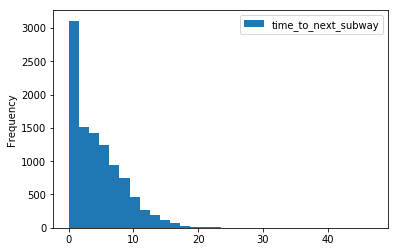

In [16]:
wait_W.plot.hist(x='time', y='time_to_next_subway', bins=30)

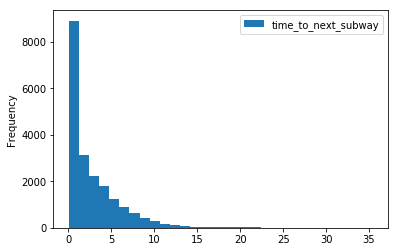

In [17]:
wait_F.plot.hist(x='time', y='time_to_next_subway', bins=30)

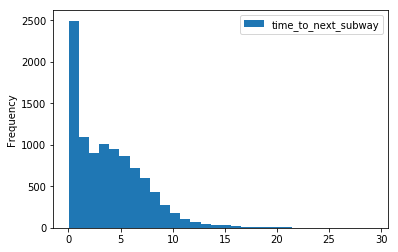

In [18]:
wait_G.plot.hist(x='time', y='time_to_next_subway', bins=30)

In [19]:
#make matrices
matrix_7 = wait_7['time_to_next_subway'].as_matrix()
matrix_5 = wait_5['time_to_next_subway'].as_matrix()
matrix_W = wait_W['time_to_next_subway'].as_matrix()
matrix_F = wait_F['time_to_next_subway'].as_matrix()
matrix_G = wait_G['time_to_next_subway'].as_matrix()

/Users/mariumsultan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/Users/mariumsultan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
/Users/mariumsultan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/mariumsultan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/mariumsultan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


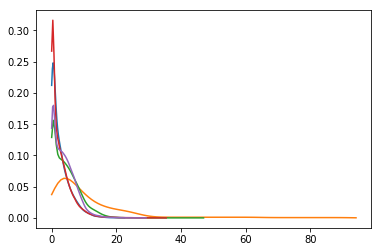

In [20]:
# this create the kernel, given an array it will estimate the probability over that values
kde_7 = gaussian_kde(matrix_7)
kde_5 = gaussian_kde(matrix_5)
kde_W = gaussian_kde(matrix_W)
kde_F = gaussian_kde(matrix_F)
kde_G = gaussian_kde(matrix_G)

# these are the values over wich your kernel will be evaluated
dist_space_7 = linspace( min(matrix_7), max(matrix_7), 100)
dist_space_5 = linspace( min(matrix_5), max(matrix_5), 100)
dist_space_W = linspace( min(matrix_W), max(matrix_W), 100)
dist_space_F = linspace( min(matrix_F), max(matrix_F), 100)
dist_space_G = linspace( min(matrix_G), max(matrix_G), 100)

# plot the results
plt.plot( dist_space_7, kde_7(dist_space_7) )
plt.plot( dist_space_5, kde_5(dist_space_5) )
plt.plot( dist_space_W, kde_W(dist_space_W) )
plt.plot( dist_space_F, kde_F(dist_space_F) )
plt.plot( dist_space_G, kde_G(dist_space_G) )

## Bus Wait Time Distributions 

In [21]:
#matrix_Q72 = Q72_waits['time_to_next_bus'].as_matrix()
matrix_Q70 = Q70_waits['time_to_next_bus'].as_matrix()
matrix_Q48 = Q48_waits['time_to_next_bus'].as_matrix()
matrix_M60 = M60_waits['time_to_next_bus'].as_matrix()


/Users/mariumsultan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/Users/mariumsultan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
/Users/mariumsultan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


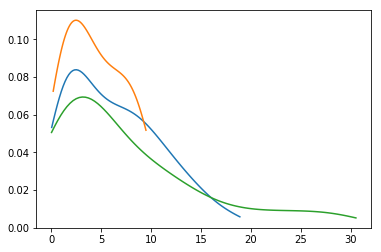

In [23]:
# this create the kernel, given an array it will estimate the probability over that values
kde_Q70 = gaussian_kde(matrix_Q70)
kde_Q48 = gaussian_kde(matrix_Q48)
kde_M60 = gaussian_kde(matrix_M60)

# these are the values over wich your kernel will be evaluated
dist_space_Q70 = linspace( min(matrix_Q70), max(matrix_Q70), 100)
dist_space_Q48 = linspace( min(matrix_Q48), max(matrix_Q48), 100)
dist_space_M60 = linspace( min(matrix_M60), max(matrix_M60), 100)


# plot the results
plt.plot( dist_space_Q70, kde_Q70(dist_space_Q70) )
plt.plot( dist_space_Q48, kde_Q48(dist_space_Q48) )
plt.plot( dist_space_M60, kde_M60(dist_space_M60) )

plt.show()

## Bus Travel Time Distributions


In [24]:
Q70_travel['travel_time_mins'] = Q70_travel['travel_time_seconds']/60
M60_travel['travel_time_mins'] = M60_travel['travel_time_seconds']/60
Q48_travel['travel_time_mins'] = Q48_travel['travel_time_seconds']/60

Q70_travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
LGA_Arrival            45 non-null object
Departure              45 non-null object
travel_time_seconds    45 non-null int64
travel_time_mins       45 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ KB


In [25]:
Q70_travel

,LGA_Arrival,Departure,travel_time_seconds,travel_time_mins
0,2018-12-14 21:59:48.639,2018-12-14 21:45:46.909,842,14.033333
1,2018-12-14 22:08:30.516,2018-12-14 21:54:26.780,844,14.066667
2,2018-12-14 22:38:07.979,2018-12-14 22:21:04.504,1023,17.050000
3,2018-12-14 22:32:31.362,2018-12-14 22:10:41.988,1309,21.816667
4,2018-12-14 22:27:13.978,2018-12-14 22:11:05.936,968,16.133333
5,2018-12-14 22:22:59.232,2018-12-14 22:13:03.700,596,9.933333
6,2018-12-14 23:43:38.848,2018-12-14 22:50:42.136,3177,52.950000
7,2018-12-14 23:13:32.391,2018-12-14 22:52:10.544,1282,21.366667
8,2018-12-14 23:21:52.383,2018-12-14 22:56:38.912,1513,25.216667
9,2018-12-14 23:33:02.983,2018-12-14 23:08:14.591,1488,24.800000


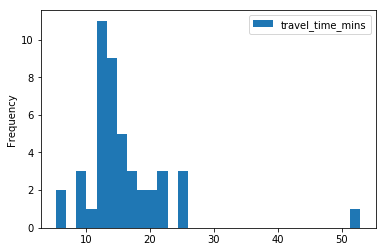

In [26]:
Q70_travel.plot.hist(x='Departure', y='travel_time_mins', bins=30)

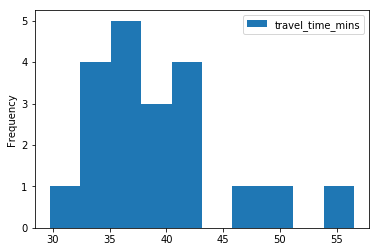

In [27]:
M60_travel.plot.hist(x='travel_time_seconds', y='travel_time_mins', bins=10)

In [29]:
matrix_Q70_travel = Q70_travel['travel_time_mins'].as_matrix()
matrix_M60_travel = M60_travel['travel_time_mins'].as_matrix()
matrix_M48_travel = Q48_travel['travel_time_mins'].as_matrix()


/Users/mariumsultan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Users/mariumsultan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/Users/mariumsultan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


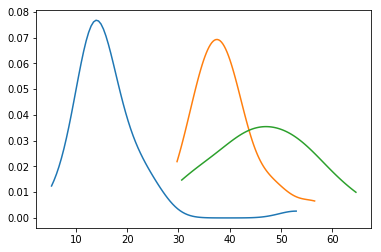

In [30]:
kde_Q70_travel = gaussian_kde(matrix_Q70_travel)
kde_M60_travel = gaussian_kde(matrix_M60_travel)
kde_M48_travel = gaussian_kde(matrix_M48_travel)

dist_space_Q70_travel = linspace( min(matrix_Q70_travel), max(matrix_Q70_travel), 100)
dist_space_M60_travel = linspace( min(matrix_M60_travel), max(matrix_M60_travel), 100)
dist_space_M48_travel = linspace( min(matrix_M48_travel), max(matrix_M48_travel), 100)

plt.plot( dist_space_Q70_travel, kde_Q70_travel(dist_space_Q70_travel) )
plt.plot( dist_space_M60_travel, kde_M60_travel(dist_space_M60_travel) )
plt.plot( dist_space_M48_travel, kde_M48_travel(dist_space_M48_travel) )


## Models 

### Route 1a: Times Sq - 7 train to air train to LGA

In [37]:
result = []

for i in range(1000):
    wait_7 = kde_7.resample(1)
    #travel = np.random.normal(loc=31.0, scale=1.0, size=None)
    travel_7 = 31
    wait_air = np.random.randint(0,6)
    travel_air = 6


    total_time = wait_7 + travel_7 + wait_air + travel_air 
    
    result.extend(total_time)

result_1a = pd.DataFrame(columns=['total_time'], data=result)
result_1a.head()

,total_time
0,40.259597
1,40.781764
2,41.302207
3,39.071201
4,42.917976


(array([ 9., 21., 33., 41., 48., 58., 56., 64., 74., 73., 73., 65., 66.,
        44., 53., 31., 30., 26., 23., 23., 17.,  8.,  7., 13.,  8.,  5.,
         1.,  1.,  5.,  4.,  4.,  1.,  3.,  4.,  1.,  2.,  0.,  2.,  0.,
         0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([36.27456557, 36.80926323, 37.34396089, 37.87865855, 38.41335621,
        38.94805387, 39.48275153, 40.01744919, 40.55214685, 41.08684451,
        41.62154217, 42.15623983, 42.69093749, 43.22563515, 43.76033281,
        44.29503047, 44.82972813, 45.36442579, 45.89912345, 46.43382111,
        46.96851877, 47.50321643, 48.03791409, 48.57261175, 49.10730941,
        49.64200707, 50.17670473, 50.7114024 , 51.24610006, 51.78079772,
        52.31549538, 52.85019304, 53.3848907 , 53.91958836, 54.45428602,
        54.98898368, 55.52368134, 56.058379  , 56.59307666, 57.12777432,
        57.66247198, 58.19716964, 58.7318673 , 59.26656496, 59.80126262,
        60.33596028, 60.87065794, 61.4053556 , 61.94005326,

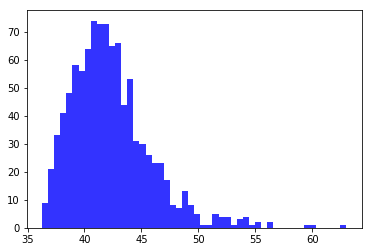

In [38]:
plt.hist(result_1a['total_time'], color="b",alpha=.8, bins=50)

In [39]:
result_1a.describe()

,total_time
count,1000.000000
mean,42.317055
std,3.553857
min,36.274566
25%,39.839654
50%,41.763766
75%,43.994495
max,63.009449


### Route 1b: Times Sq - F train to Q70 to LGA

In [40]:
result = []

for i in range(1000):
    wait_F = kde_F.resample(1)
    #travel = np.random.normal(loc=31.0, scale=1.0, size=None)
    travel_F = 21
    wait_Q70 = kde_Q70.resample(1)
    travel_Q70 = kde_Q70_travel.resample(1)


    total_time = wait_F + travel_F + wait_Q70 + travel_Q70 
    
    result.extend(total_time)
    
result_1b = pd.DataFrame(columns=['total_time'], data=result)
result_1b.head()

,total_time
0,37.176611
1,28.750618
2,42.161273
3,34.995374
4,40.618155


(array([ 1.,  3.,  7.,  6., 11., 10., 27., 29., 40., 56., 65., 57., 77.,
        82., 56., 60., 54., 45., 55., 41., 42., 38., 28., 25., 16., 13.,
         9.,  9.,  0.,  3.,  1.,  1.,  2.,  2.,  3.,  2.,  3.,  4.,  1.,
         2.,  1.,  1.,  1.,  3.,  3.,  1.,  0.,  2.,  1.,  1.]),
 array([23.2980339 , 24.77147211, 26.24491033, 27.71834855, 29.19178676,
        30.66522498, 32.13866319, 33.61210141, 35.08553962, 36.55897784,
        38.03241605, 39.50585427, 40.97929248, 42.4527307 , 43.92616892,
        45.39960713, 46.87304535, 48.34648356, 49.81992178, 51.29335999,
        52.76679821, 54.24023642, 55.71367464, 57.18711285, 58.66055107,
        60.13398929, 61.6074275 , 63.08086572, 64.55430393, 66.02774215,
        67.50118036, 68.97461858, 70.44805679, 71.92149501, 73.39493322,
        74.86837144, 76.34180966, 77.81524787, 79.28868609, 80.7621243 ,
        82.23556252, 83.70900073, 85.18243895, 86.65587716, 88.12931538,
        89.60275359, 91.07619181, 92.54963003, 94.02306824,

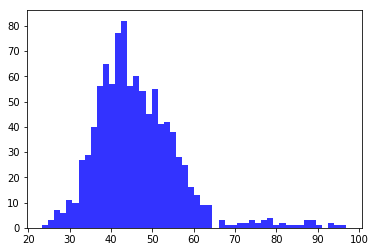

In [41]:
plt.hist(result_1b['total_time'], color="b",alpha=.8, bins=50)

In [42]:
result_1b.describe()

,total_time
count,1000.000000
mean,46.307729
std,10.399204
min,23.298034
25%,39.410677
50%,44.537893
75%,51.581789
max,96.969945


### Route 2a: Flushing - 7 train to air train to LGA

In [43]:
result = []

for i in range(1000):
    wait_7 = kde_7.resample(1)
    #travel = np.random.normal(loc=31.0, scale=1.0, size=None)
    travel_7 = 3
    wait_air = np.random.randint(0,6)
    travel_air = 6


    total_time = wait_7 + travel_7 + wait_air + travel_air 
    
    result.extend(total_time)
    
result_2a = pd.DataFrame(columns=['total_time'], data=result)
result_2a.head()

,total_time
0,8.843827
1,15.216514
2,11.677183
3,24.466663
4,22.782819


(array([ 1.,  8., 28., 29., 45., 55., 49., 68., 79., 84., 73., 77., 69.,
        59., 34., 33., 33., 25., 28., 18., 12., 17., 16., 16.,  7.,  5.,
         9.,  7.,  2.,  2.,  5.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.]),
 array([ 7.40893888,  7.9748769 ,  8.54081491,  9.10675293,  9.67269094,
        10.23862896, 10.80456697, 11.37050499, 11.936443  , 12.50238102,
        13.06831903, 13.63425705, 14.20019506, 14.76613308, 15.3320711 ,
        15.89800911, 16.46394713, 17.02988514, 17.59582316, 18.16176117,
        18.72769919, 19.2936372 , 19.85957522, 20.42551323, 20.99145125,
        21.55738926, 22.12332728, 22.68926529, 23.25520331, 23.82114133,
        24.38707934, 24.95301736, 25.51895537, 26.08489339, 26.6508314 ,
        27.21676942, 27.78270743, 28.34864545, 28.91458346, 29.48052148,
        30.04645949, 30.61239751, 31.17833553, 31.74427354, 32.31021156,
        32.87614957, 33.44208759, 34.0080256 , 34.57396362,

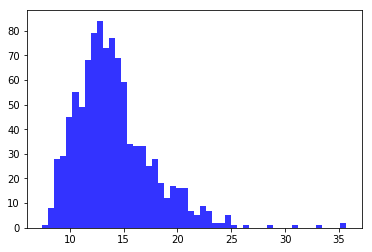

In [44]:
plt.hist(result_2a['total_time'], color="b",alpha=.8, bins=50)

In [45]:
result_2a.describe()

,total_time
count,1000.000000
mean,14.081349
std,3.595563
min,7.408939
25%,11.712940
50%,13.485538
75%,15.802620
max,35.705840


### Route 2b: Flushing - 7 train to Q70 to LGA

In [46]:
result = []

for i in range(1000):
    wait_7 = kde_7.resample(1)
    #travel = np.random.normal(loc=31.0, scale=1.0, size=None)
    travel_7 = 10
    wait_Q70 = kde_Q70.resample(1)
    travel_Q70 = kde_Q70_travel.resample(1)


    total_time = wait_7 + travel_7 + wait_Q70 + travel_Q70 
    
    result.extend(total_time)

result_2b = pd.DataFrame(columns=['total_time'], data=result)
result_2b.head()

,total_time
0,37.124049
1,31.238990
2,21.040985
3,24.447525
4,77.925968


(array([ 2.,  2.,  6., 11., 13., 18., 22., 34., 30., 46., 50., 57., 84.,
        62., 62., 69., 73., 64., 49., 51., 42., 27., 24., 19., 13., 13.,
         5.,  4.,  4.,  5.,  3.,  2.,  1.,  1.,  0.,  2.,  0.,  3.,  4.,
         1.,  5.,  3.,  2.,  2.,  0.,  3.,  1.,  3.,  0.,  3.]),
 array([12.33872439, 13.79214858, 15.24557278, 16.69899698, 18.15242118,
        19.60584538, 21.05926958, 22.51269378, 23.96611798, 25.41954218,
        26.87296637, 28.32639057, 29.77981477, 31.23323897, 32.68666317,
        34.14008737, 35.59351157, 37.04693577, 38.50035997, 39.95378417,
        41.40720836, 42.86063256, 44.31405676, 45.76748096, 47.22090516,
        48.67432936, 50.12775356, 51.58117776, 53.03460196, 54.48802615,
        55.94145035, 57.39487455, 58.84829875, 60.30172295, 61.75514715,
        63.20857135, 64.66199555, 66.11541975, 67.56884395, 69.02226814,
        70.47569234, 71.92911654, 73.38254074, 74.83596494, 76.28938914,
        77.74281334, 79.19623754, 80.64966174, 82.10308594,

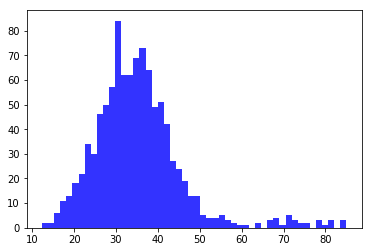

In [47]:
plt.hist(result_2b['total_time'], color="b",alpha=.8, bins=50)

In [48]:
result_2b.describe()

,total_time
count,1000.000000
mean,35.212246
std,10.601064
min,12.338724
25%,28.721226
50%,34.146471
75%,39.930714
max,85.009934


### Route 3a: Harlem 125th - 5 train to 7 train to air train to LGA

In [49]:
result = []

for i in range(1000):
    wait_5 = kde_5.resample(1)
    #travel = np.random.normal(loc=31.0, scale=1.0, size=None)
    travel_5 = 11
    wait_7 = kde_7.resample(1)
    travel_7 = 25
    wait_air = np.random.randint(0,6)
    travel_air = 6



    total_time = wait_5 + travel_5 + wait_7 + travel_7 + wait_air + travel_air 
    
    result.extend(total_time)

result_3a = pd.DataFrame(columns=['total_time'], data=result)
result_3a.head()

,total_time
0,59.504286
1,58.185121
2,54.390357
3,105.627100
4,91.521511


(array([  7.,  12.,  26.,  53.,  65., 115., 111., 102.,  91.,  88.,  64.,
         47.,  34.,  34.,  28.,  21.,  25.,   7.,   5.,   7.,   4.,   3.,
          0.,   5.,   5.,   1.,   2.,   3.,   0.,   1.,   8.,   1.,   6.,
          3.,   0.,   2.,   0.,   0.,   2.,   2.,   0.,   0.,   2.,   2.,
          1.,   1.,   0.,   0.,   2.,   2.]),
 array([ 38.27410287,  40.41895208,  42.5638013 ,  44.70865052,
         46.85349973,  48.99834895,  51.14319817,  53.28804738,
         55.4328966 ,  57.57774582,  59.72259503,  61.86744425,
         64.01229347,  66.15714268,  68.3019919 ,  70.44684112,
         72.59169033,  74.73653955,  76.88138877,  79.02623798,
         81.1710872 ,  83.31593642,  85.46078563,  87.60563485,
         89.75048407,  91.89533328,  94.0401825 ,  96.18503172,
         98.32988094, 100.47473015, 102.61957937, 104.76442859,
        106.9092778 , 109.05412702, 111.19897624, 113.34382545,
        115.48867467, 117.63352389, 119.7783731 , 121.92322232,
        124.068071

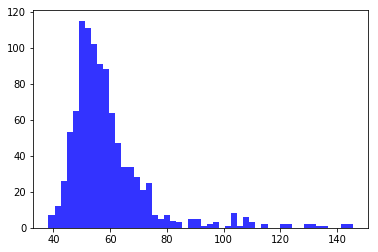

In [50]:
plt.hist(result_3a['total_time'], color="b",alpha=.8, bins=50)

In [51]:
result_3a.describe()

,total_time
count,1000.000000
mean,59.108277
std,14.720235
min,38.274103
25%,50.622415
50%,55.564240
75%,62.499397
max,145.516564


### Route 3b: Harlem 125th - M60 to LGA

In [52]:
result = []

for i in range(1000):
    wait_M60 = kde_M60.resample(1)
    travel_M60 = 39

    total_time = wait_M60 + travel_M60
    
    result.extend(total_time)

result_3b = pd.DataFrame(columns=['total_time'], data=result)
result_3b.head()

,total_time
0,41.171644
1,42.384155
2,37.563770
3,53.233462
4,41.634494


(array([ 4.,  9., 10., 18., 23., 28., 43., 41., 42., 62., 61., 59., 64.,
        48., 48., 32., 36., 34., 38., 26., 31., 27., 23., 21., 15., 19.,
        16., 10.,  9.,  9.,  4.,  5.,  3.,  8.,  8.,  7.,  2., 11., 13.,
         6., 10.,  2.,  3.,  4.,  3.,  1.,  2.,  1.,  0.,  1.]),
 array([32.99041224, 33.83559654, 34.68078085, 35.52596515, 36.37114946,
        37.21633376, 38.06151807, 38.90670237, 39.75188668, 40.59707098,
        41.44225529, 42.28743959, 43.1326239 , 43.9778082 , 44.82299251,
        45.66817681, 46.51336112, 47.35854542, 48.20372973, 49.04891403,
        49.89409834, 50.73928264, 51.58446695, 52.42965126, 53.27483556,
        54.12001987, 54.96520417, 55.81038848, 56.65557278, 57.50075709,
        58.34594139, 59.1911257 , 60.03631   , 60.88149431, 61.72667861,
        62.57186292, 63.41704722, 64.26223153, 65.10741583, 65.95260014,
        66.79778444, 67.64296875, 68.48815305, 69.33333736, 70.17852166,
        71.02370597, 71.86889027, 72.71407458, 73.55925888,

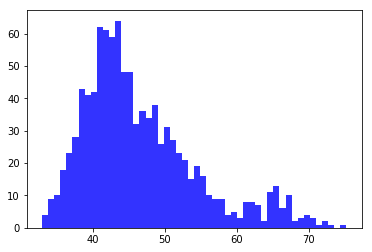

In [53]:
plt.hist(result_3b['total_time'], color="b",alpha=.8, bins=50)

In [54]:
result_3b.describe()

,total_time
count,1000.000000
mean,46.601410
std,7.978256
min,32.990412
25%,41.117873
50%,44.535788
75%,50.380310
max,75.249627


### Route 4a: Barclays Center - G train to 7 train to air train to LGA

In [55]:
result = []

for i in range(1000):
    wait_G = kde_G.resample(1)
    travel_G = 18
    wait_7 = kde_7.resample(1)
    travel_7 = 15
    wait_air = np.random.randint(0,6)
    travel_air = 6

    total_time = wait_G + travel_G + wait_7 + travel_7 + wait_air + travel_air 
    
    result.extend(total_time)

result_4a = pd.DataFrame(columns=['total_time'], data=result)
result_4a.head()

,total_time
0,51.710806
1,48.668866
2,47.563169
3,44.538280
4,47.761942


(array([ 1.,  0.,  0.,  3., 11., 17., 20., 23., 26., 47., 46., 57., 58.,
        59., 59., 54., 46., 55., 45., 48., 47., 38., 40., 31., 26., 20.,
        15., 24., 15., 13., 10.,  9., 10.,  5.,  3.,  3.,  0.,  6.,  2.,
         0.,  3.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([36.80840453, 37.46092011, 38.11343569, 38.76595126, 39.41846684,
        40.07098242, 40.72349799, 41.37601357, 42.02852914, 42.68104472,
        43.3335603 , 43.98607587, 44.63859145, 45.29110703, 45.9436226 ,
        46.59613818, 47.24865375, 47.90116933, 48.55368491, 49.20620048,
        49.85871606, 50.51123164, 51.16374721, 51.81626279, 52.46877836,
        53.12129394, 53.77380952, 54.42632509, 55.07884067, 55.73135625,
        56.38387182, 57.0363874 , 57.68890297, 58.34141855, 58.99393413,
        59.6464497 , 60.29896528, 60.95148086, 61.60399643, 62.25651201,
        62.90902758, 63.56154316, 64.21405874, 64.86657431, 65.51908989,
        66.17160547, 66.82412104, 67.47663662, 68.12915219,

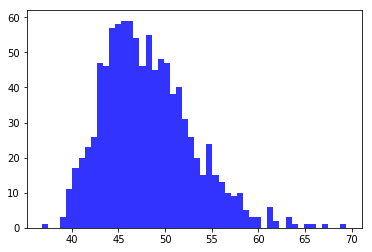

In [56]:
plt.hist(result_4a['total_time'], color="b",alpha=.8, bins=50)

In [57]:
result_4a.describe()

,total_time
count,1000.000000
mean,48.120234
std,4.771270
min,36.808405
25%,44.599580
50%,47.562425
75%,50.902888
max,69.434183


### Route 4b: Barclays Center - 5 train to W train to M60 to LGA

In [58]:
result = []

for i in range(1000):
    wait_5 = kde_5.resample(1)
    travel_5 = 29
    wait_W = kde_W.resample(1)
    travel_W = 12
    wait_M60 = kde_M60.resample(1)
    travel_M60 = kde_M60_travel.resample(1)


    total_time = wait_5 + travel_5 + wait_W + travel_W + wait_M60 + travel_M60 
    
    result.extend(total_time)

result_4b = pd.DataFrame(columns=['total_time'], data=result)
result_4b.head()

,total_time
0,102.586216
1,97.577119
2,104.814133
3,92.190026
4,111.706296


(array([ 7., 10., 14., 25., 33., 30., 50., 56., 61., 74., 70., 63., 70.,
        52., 63., 40., 53., 35., 29., 26., 29., 25.,  8.,  3.,  6.,  9.,
         8.,  8.,  4.,  4.,  4.,  1.,  2.,  3.,  3.,  2.,  1.,  2.,  3.,
         2.,  1.,  5.,  2.,  0.,  0.,  2.,  0.,  0.,  1.,  1.]),
 array([ 70.92241762,  73.39767423,  75.87293085,  78.34818746,
         80.82344407,  83.29870068,  85.77395729,  88.24921391,
         90.72447052,  93.19972713,  95.67498374,  98.15024036,
        100.62549697, 103.10075358, 105.57601019, 108.05126681,
        110.52652342, 113.00178003, 115.47703664, 117.95229325,
        120.42754987, 122.90280648, 125.37806309, 127.8533197 ,
        130.32857632, 132.80383293, 135.27908954, 137.75434615,
        140.22960277, 142.70485938, 145.18011599, 147.6553726 ,
        150.13062921, 152.60588583, 155.08114244, 157.55639905,
        160.03165566, 162.50691228, 164.98216889, 167.4574255 ,
        169.93268211, 172.40793873, 174.88319534, 177.35845195,
        179.

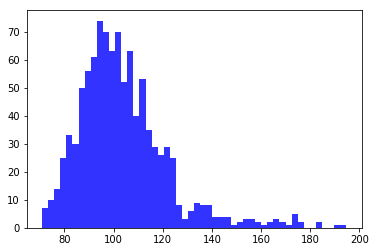

In [59]:
plt.hist(result_4b['total_time'], color="b",alpha=.8, bins=50)

In [60]:
result_4b.describe()

,total_time
count,1000.000000
mean,103.764136
std,18.317652
min,70.922418
25%,91.581655
50%,100.895627
75%,111.840147
max,194.685248


## Hypothesis Tests

In [ ]:
#https://pythonfordatascience.org/welch-t-test-python-pandas/

airtrain versus now, which is faster? 


In [65]:
TimesSq_airtrain= result_1a['total_time']
TimesSq_now= result_1b['total_time']



In [66]:
stats.ttest_ind(TimesSq_airtrain, TimesSq_now, equal_var = False)


Ttest_indResult(statistic=-11.48313959940517, pvalue=4.5840270950342245e-29)

In [67]:
TimesSq_now.mean()

46.30772856208306

In [68]:
TimesSq_now.std()

10.399204495325899

In [69]:
TimesSq_airtrain.mean()

42.31705496002682

In [70]:
TimesSq_airtrain.std()

3.55385704372641

In [71]:
Flushing_airtrain= result_2a['total_time']
Flushing_now= result_2b['total_time']




In [72]:
stats.ttest_ind(Flushing_airtrain, Flushing_now, equal_var = False)


Ttest_indResult(statistic=-59.69307818394244, pvalue=0.0)

In [73]:
Flushing_airtrain.mean()

14.081348528580095

In [88]:
Flushing_airtrain.std()

3.595562908057629

In [74]:
Flushing_now.mean()

35.21224612541093

In [87]:
Flushing_now.std()

10.601064354853243

In [75]:
Harlem_airtrain = result_3a['total_time']
Harlem_now = result_3b['total_time']

In [76]:
Harlem_airtrain.mean()

59.10827668495056

In [77]:
Harlem_airtrain.std()

14.720234670289841

In [78]:
Harlem_now.mean()

46.60141048023725

In [79]:
Harlem_now.std()

7.978256310942072

In [80]:
stats.ttest_ind(Harlem_airtrain, Harlem_now, equal_var = False)


Ttest_indResult(statistic=23.621507456176747, pvalue=1.6074758370917954e-105)

In [81]:
Barclays_airtrain = result_4a['total_time']
Barclays_now = result_4b['total_time']

In [82]:
Barclays_airtrain.std()

4.771270476576488

In [83]:
Barclays_airtrain.mean()

48.12023411551281

In [84]:
Barclays_now.std()

18.3176524789889

In [85]:
Barclays_now.mean()

103.76413642598295

In [86]:
stats.ttest_ind(Barclays_airtrain, Barclays_now, equal_var = False)



Ttest_indResult(statistic=-92.95940135694153, pvalue=0.0)